# App dataset with decision trees

In [2]:
import pandas as pd

In [3]:
app_dataset = pd.DataFrame({
    'Gender': ['Female','Female','Male','Female','Male','Male'],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']})
app_dataset

,Gender,Age,App
0,Female,15,Atom Count
1,Female,25,Check Mate Mate
2,Male,32,Beehive Finder
3,Female,35,Check Mate Mate
4,Male,12,Atom Count
5,Male,14,Atom Count


In [4]:
app_dataset_one_hot = pd.DataFrame(
    {'Gender_Female':[1,1,0,1,0,0],
     'Gender_Male':[0,0,1,0,1,1],
     'Age_Young':[1,0,0,0,1,1],
     'Age_Old':[0,1,1,1,0,0],
     'App_Atom_Count':[1,0,0,0,1,1],
     'App_Beehive_Finder':[0,0,1,0,0,0],
     'App_Check_Mate_Mate':[0,1,0,1,0,0]})
app_dataset_one_hot

,Gender_Female,Gender_Male,Age_Young,Age_Old,App_Atom_Count,App_Beehive_Finder,App_Check_Mate_Mate
0,1,0,1,0,1,0,0
1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0
5,0,1,1,0,1,0,0


In [5]:
X = app_dataset_one_hot[['Gender_Female','Gender_Male','Age_Old','Age_Young']]
y = app_dataset_one_hot[['App_Atom_Count','App_Beehive_Finder','App_Check_Mate_Mate']]

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)
dt.score(X,y)

1.0

In [7]:
X

,Gender_Female,Gender_Male,Age_Old,Age_Young
0,1,0,0,1
1,1,0,1,0
2,0,1,1,0
3,1,0,1,0
4,0,1,0,1
5,0,1,0,1


In [8]:
y

,App_Atom_Count,App_Beehive_Finder,App_Check_Mate_Mate
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
5,1,0,0


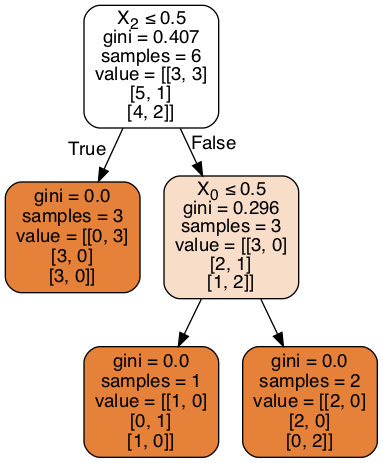

In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [17]:
app_dataset = pd.DataFrame({
    'Gender_Female':[1,1,0,1,0,0],
    'Gender_Male':[0,0,1,0,1,1],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']})
print(app_dataset)

   Gender_Female  Gender_Male  Age              App
0              1            0   15       Atom Count
1              1            0   25  Check Mate Mate
2              0            1   32   Beehive Finder
3              1            0   35  Check Mate Mate
4              0            1   12       Atom Count
5              0            1   14       Atom Count


In [21]:
features = app_dataset[['Age','Gender_Female','Gender_Male']]
print(features)

   Age  Gender_Female  Gender_Male
0   15              1            0
1   25              1            0
2   32              0            1
3   35              1            0
4   12              0            1
5   14              0            1


In [22]:
labels = app_dataset['App']
print(labels)

0         Atom Count
1    Check Mate Mate
2     Beehive Finder
3    Check Mate Mate
4         Atom Count
5         Atom Count
Name: App, dtype: object


In [23]:
app_model = DecisionTreeClassifier()
app_model.fit(features, labels)
app_model.score(features, labels)

1.0

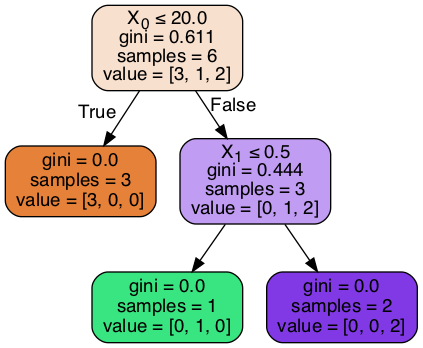

In [25]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(app_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Gini index calculation

In [26]:
from __future__ import division

In [27]:
elements = ['A', 'A', 'A', 'C', 'B', 'C']
def counts(elements):
    classes = {}
    for element in elements:
        if element in classes:
            classes[element] += 1
        else:
            classes[element] = 1
    return [classes[e] for e in classes]
counts(elements)

[3, 2, 1]

In [28]:
def gini(counts):
    n = sum(counts)
    return 1 - sum([p_i**2/n**2 for p_i in counts])
gini(counts(elements))

0.6111111111111112

In [29]:
# Splitting age on 13
gini(counts(elements)) - (gini([1])*1/6 + gini([2,1,2])*5/6)

0.07777777777777783

In [30]:
# Splitting age on 14.5
gini(counts(elements)) - (gini([2])*2/6 + gini([1,1,2])*4/6)

0.19444444444444448

In [31]:
# Splitting age on 20
gini(counts(elements)) - (gini([3])*3/6 + gini([1,2])*3/6)

0.38888888888888895

In [32]:
# Splitting age on 27
gini(counts(elements)) - (gini([3,1])*4/6 + gini([1,1])*2/6)

0.19444444444444453

In [33]:
# Splitting age on 33
gini(counts(elements)) - (gini([3,1,1])*5/6 + gini([1])*1/6)

0.14444444444444443

# Spam example

In [37]:
spam_dataset = pd.DataFrame({
    'Lottery':[7,3,9,1,2,4,1,3,6,7,8,9],
    'Sale':[1,2,3,3,6,7,9,10,5,8,4,6],
    'Spam': ['no','no','no','no','no','no','yes','yes','yes','yes','yes','yes']})
spam_dataset

,Lottery,Sale,Spam
0,7,1,no
1,3,2,no
2,9,3,no
3,1,3,no
4,2,6,no
5,4,7,no
6,1,9,yes
7,3,10,yes
8,6,5,yes
9,7,8,yes


In [41]:
X = spam_dataset[['Lottery', 'Sale']]
y = spam_dataset['Spam']
spam_decision_tree = DecisionTreeClassifier()
spam_decision_tree.fit(X,y)
spam_decision_tree.score(X,y)

1.0

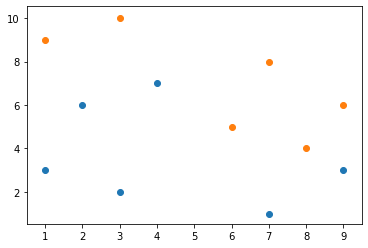

In [42]:
from matplotlib import pyplot as plt
plt.scatter(X['Lottery'][:6], X['Sale'][:6])
plt.scatter(X['Lottery'][6:], X['Sale'][6:])

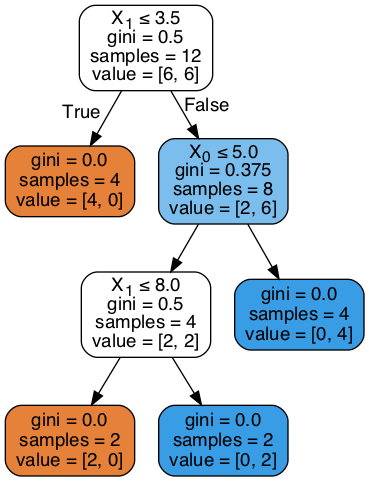

In [43]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(spam_decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())